In [1]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv('Resources/lending_data.csv')

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
Y = df['loan_status']

# Separate the X variable, the features
X = df.iloc[:, :-1]

In [4]:
# Review the y variable Series
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
Y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [7]:
# Data Explorations 

from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(X)

transform = pca.fit_transform(X)

df_pca = pd.DataFrame(transform, columns = ['PCA1', 'PCA2', 'PCA3'])
df_pca['Y'] = Y

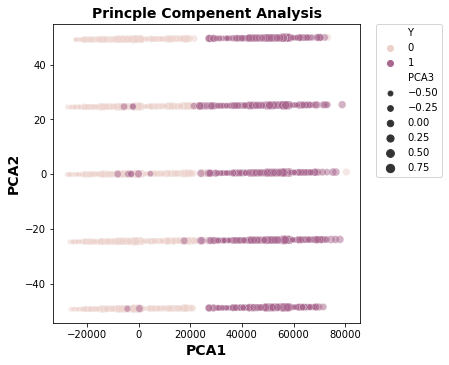

[9.99993701e-01 6.29778292e-06 7.42306943e-10]


In [8]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x = 'PCA1', y = 'PCA2', size = 'PCA3', data = df_pca, 
               hue = 'Y', alpha = 0.5, hue_norm=(0, 2))


plt.xlabel('PCA1', fontsize=14, fontweight='bold')
plt.ylabel('PCA2', fontsize=14, fontweight='bold')
plt.title('Princple Compenent Analysis', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


plt.show()

print(pca.explained_variance_ratio_)

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [9]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [10]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(random_state = 1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [11]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [12]:
# Print the balanced_accuracy score of the model
print(balanced_accuracy_score(y_test, y_pred))

0.9521352751368186


In [13]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)

# Calculating the accuracy score

cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,14926,75
Actual 1,46,461


In [14]:
# Print the classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model is better at predicting healthy loans (0) relative to high-risk loan. This is expected due to the significant disparity between healthy and high-risk loans. 

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [15]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
rs = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_res, Y_res = rs.fit_resample(X_train, y_train)

In [16]:
# Count the distinct values of the resampled labels data
Y_res.value_counts()

0    60035
1    60035
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [17]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state = 1)

# Fit the model using the resampled training data
model.fit(X_res, Y_res)

# Make a prediction using the testing data
y_pred = model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [18]:
# Print the balanced_accuracy score of the model
print(balanced_accuracy_score(y_test, y_pred))

0.9941749445500477


In [19]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)

# Calculating the accuracy score

cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,14915,86
Actual 1,3,504


In [20]:

# Print the classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The oversampled data still predicts healthy loans (0) relatively better than high-risk loan (1). However, recall has significantly improved for high-risk loans at a slight sacrifice of recall for healthy loans. 